In [21]:
# run my code
%run megatron_ak.ipynb

### Read in Data

In [22]:
datadir = '../../preprocess/kleinlab/output_subset/'
cellid_to_idx, cloneid_to_idx, clonegrouping_spmtx, coords_mtx, time_vec = readin(datadir)

Number of cells:  3221
Number of clones:  5864
Number of dimensions:  2
Time Steps:  [2. 4. 6.]


## Trials

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics.cluster import adjusted_rand_score
df_truth = pd.read_csv(os.path.join(datadir,'./clones_truth.tsv.gz'),sep='\t',index_col=0)
linkage_options = ['complete', 'ward', 'average', 'weighted', 'centroid', 'median']
cluster_options = ['maxclust']

### Wasserstein Trials

In [7]:
dist_options = ['wasserstein', 'energy']

wass_score_dict = {}
for do in dist_options:
    condensed_dist_mat = getdistance_wasserstein(clonegrouping_spmtx, coords_mtx, time_vec, choice=do)
    for lo in linkage_options:
        Z = linkage(condensed_dist_mat, lo)
        for co in cluster_options:
            clone_clusters = fcluster(Z, 5, criterion=co)
            score = adjusted_rand_score(df_truth['celltype'].tolist(), clone_clusters.tolist())
            wass_score_dict[(do, lo, co)]=score

Out of 66430 clonal distances, 0 are noninformative
Out of 66430 clonal distances, 0 are noninformative


In [10]:
listofTuples = sorted(wass_score_dict.items() , reverse=True, key=lambda x: x[1])
for elem in listofTuples :
    print(elem[0] , "\t\t" , elem[1] )

('energy', 'ward', 'maxclust') 		 0.7899530119959177
('wasserstein', 'ward', 'maxclust') 		 0.7885719124781362
('wasserstein', 'median', 'maxclust') 		 0.7616486910947495
('energy', 'average', 'maxclust') 		 0.7502881477816572
('energy', 'weighted', 'maxclust') 		 0.7412519902286092
('wasserstein', 'centroid', 'maxclust') 		 0.7294044632136572
('energy', 'complete', 'maxclust') 		 0.7289260391327324
('wasserstein', 'average', 'maxclust') 		 0.7105797278643441
('wasserstein', 'complete', 'maxclust') 		 0.6990144268531757
('wasserstein', 'weighted', 'maxclust') 		 0.5355769532850246
('energy', 'median', 'maxclust') 		 0.5007467235162486
('energy', 'centroid', 'maxclust') 		 0.47804527941231256
('energy', 'single', 'maxclust') 		 0.18600624102198973
('wasserstein', 'single', 'maxclust') 		 -0.0034818974557002946


### MNN Trials - Radius Graph

In [24]:
r_options = [x/10 for x in range(0, 100, 5)]
mode_options = ["distance", "connectivity"]
slope_options = [x for x in range(1, 3)]
xshift_options = [x for x in range(1, 10)]

mnn_r_score_dict = {}
for ro in r_options:
    for mo in mode_options:
        for so in slope_options:
            for xo in xshift_options:
                condensed_dist_mat = getdistance_mnn_debug(
                    clonegrouping_spmtx, coords_mtx, time_vec, 
                    dist="radius", radius=ro, mode=mo, 
                    slope = so, xshift = xo)
                for lo in linkage_options:
                    Z = linkage(condensed_dist_mat, lo)
                    for co in cluster_options:
                        clone_clusters = fcluster(Z, 5, criterion=co)
                        score = adjusted_rand_score(df_truth['celltype'].tolist(), clone_clusters.tolist())
                        mnn_r_score_dict[(ro, mo, so, xo, lo, co)]=score
                        print((ro, mo, so, xo, lo, co), "\t", score)

Number of clones: 365
Calculated neighbors graph
Calculated nonzero coordinates
Calculated 10000 distances...
Calculated 20000 distances...
Calculated 30000 distances...
Calculated 40000 distances...
Calculated 50000 distances...
Calculated 60000 distances...


ValueError: setting an array element with a sequence.

In [ ]:
listofTuples = sorted(mnn_r_score_dict.items() , reverse=True, key=lambda x: x[1])
for elem in listofTuples :
    print(elem[0] , "\t\t" , elem[1] )

### MNN Trials - KNN Graph

In [ ]:
k_options = [x for x in range(10, 100, 30)]
mode_options = ["distance", "connectivity"]
slope_options = [x for x in range(1, 3)]
xshift_options = [x for x in range(1, 10)]

mnn_k_score_dict = {}
for ko in k_options:
    for mo in mode_options:
        for so in slope_options:
            for xo in xshift_options:
                getdistance_mnn(clonegrouping_spmtx, coords_mtx, time_vec, 
                    dist="kneighbors", neighbors=ko, mode=mo, 
                    slope = so, xshift = xo)
                for lo in linkage_options:
                    Z = linkage(condensed_dist_mat, lo)
                    for co in cluster_options:
                        clone_clusters = fcluster(Z, 5, criterion=co)
                        score = adjusted_rand_score(df_truth['celltype'].tolist(), clone_clusters.tolist())
                        mnn_k_score_dict[(ko, mo, so, xo, lo, co)]=score
                        print(score)

In [ ]:
listofTuples = sorted(mnn_k_score_dict.items() , reverse=True, key=lambda x: x[1])
for elem in listofTuples :
    print(elem[0] , "\t\t" , elem[1] )

### MNN Troubleshooting

Number of clones: 365
Calculated neighbors graph
Calculated 10000 distances...
Calculated 20000 distances...
Calculated 30000 distances...
Calculated 40000 distances...
Calculated 50000 distances...
Calculated 60000 distances...
(1.0, 'distance', 1, 1)


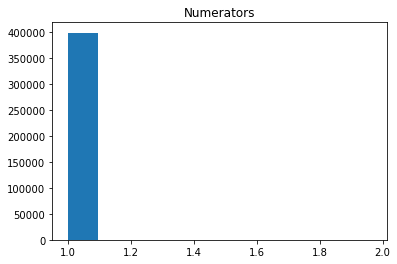

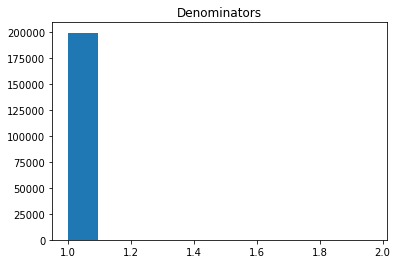

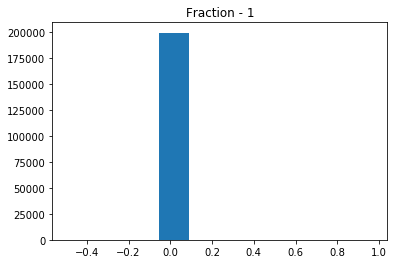

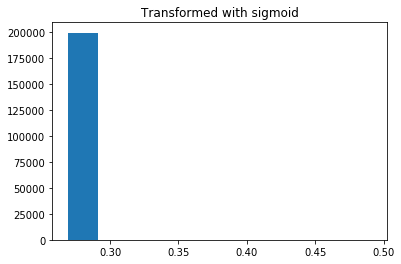

Number of clones: 365
Calculated neighbors graph
Calculated 10000 distances...
Calculated 20000 distances...
Calculated 30000 distances...
Calculated 40000 distances...
Calculated 50000 distances...


In [ ]:
%run megatron_ak.ipynb
r_options = [x/10 for x in range(10, 100, 30)]
mode_options = ["distance", "connectivity"]
slope_options = [x for x in range(1, 3)]
xshift_options = [x for x in range(1, 3)]

for ro in r_options:
    for mo in mode_options:
        for so in slope_options:
            for xo in xshift_options:
                dm, fracs, trans, numers, denoms = getdistance_mnn_debug(
                    clonegrouping_spmtx, coords_mtx, time_vec, dist="radius", 
                    radius=ro, mode=mo, slope=so, xshift=xo)
                print((ro,mo,so,xo))
                plt.hist(numers)
                plt.title('Numerators')
                plt.show()
                plt.hist(denoms)
                plt.title('Denominators')
                plt.show()
                plt.hist(fracs)
                plt.title('Fraction - 1')
                plt.show()
                plt.hist(trans)
                plt.title('Transformed with sigmoid')
                plt.show()

Number of clones: 365
Calculated neighbors graph
Calculated nonzero coordinates
Calculated 10000 distances...
Calculated 20000 distances...
Calculated 30000 distances...
Calculated 40000 distances...
Calculated 50000 distances...
Calculated 60000 distances...


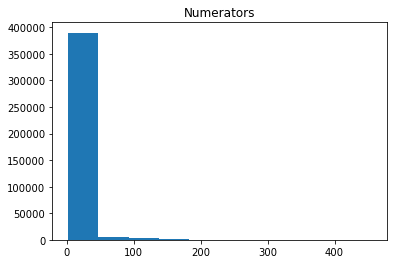

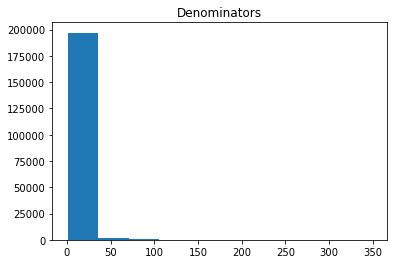

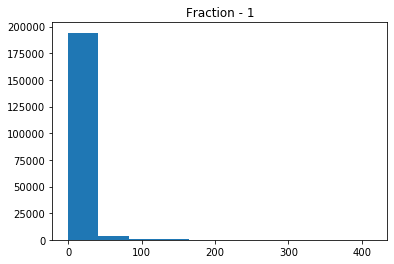

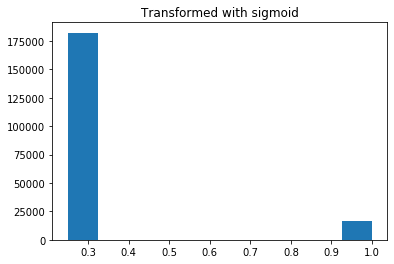

In [14]:
dm, fracs, trans, numers, denoms = getdistance_mnn_debug(
    clonegrouping_spmtx, coords_mtx, time_vec, dist="kneighbors", 
    neighbors=10, mode="distance", slope=4.6, xshift=1.1)
plt.hist(numers)
plt.title('Numerators')
plt.show()
plt.hist(denoms)
plt.title('Denominators')
plt.show()
plt.hist(fracs)
plt.title('Fraction - 1')
plt.show()
plt.hist(trans)
plt.title('Transformed with sigmoid')
plt.show()

In [17]:
from collections import Counter
print(Counter(fracs))
print("HERE")
print(Counter(trans))

Counter({0.0: 182295, 80.84272617867381: 330, 12.23077184808877: 327, 22.356925660743272: 327, 36.445878463826276: 300, 26.362731743884193: 292, 22.774432089516473: 289, 93.42028474986589: 278, 36.7590204711713: 274, 23.00759600653669: 272, 36.79945408562478: 263, 41.60856927364827: 258, 30.81288042361502: 257, 41.11254380356441: 247, 22.618351177749236: 240, 51.16664091346345: 238, 30.091004054368227: 238, 38.89205895809564: 234, 11.299253824921056: 234, 41.57216032394755: 224, 53.37552728924707: 224, 15.932186698629998: 222, 145.29260884602698: 217, 24.845022137240885: 210, 117.27110274196022: 191, 27.02149670170018: 187, 10.592327883898232: 182, 15.979228423174902: 176, 57.666107281487285: 157, 35.81465979422681: 155, 15.323687088948358: 155, 41.8152772649936: 139, 71.22496750400575: 136, 20.59696836915575: 133, 23.265516134014028: 133, 56.27359552223394: 126, 80.76685628793535: 123, 29.462451621569684: 121, 92.55287744170228: 114, 62.951291654739: 113, 72.91592392853238: 113, 35.97